In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [59]:
def generate_ripple(t, center, A_0=1, scale=0.1, omega=30):
    A = A_0 * stats.norm.pdf(t, loc=center, scale=scale)
    phase = np.exp(2.*np.pi * omega * 1j*t)
    
    flag = np.zeros_like(A)
    flag[A>np.max(A)/4.] = 1
    
    return np.real(A * phase), flag


def generate_fake_data(sf=1.e-3, t_0=0, t_max=10, noise_level=1., n_spikes=10):
    t = np.arange(t_0, t_max, sf)
    x = np.zeros_like(t)
    y = np.zeros_like(t)

    x += noise_level * np.random.randn(t.shape[0])
    for _ in range(n_spikes):
        while True:
            loc = np.random.uniform(t_0, t_max, 1)   
            ripple, truth = generate_ripple(t, loc)
            if np.max(y+truth)==1:
                x += ripple
                y += truth
                break
    y = y.astype(int)
    
    return t, x, y
    

In [60]:
t, x, y = generate_fake_data()

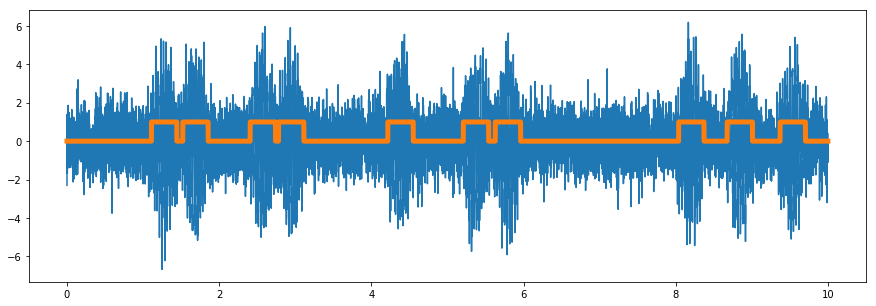

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(t, x, )
plt.plot(t, y, lw=5)
plt.show()

In [ ]:
N = 10000

X = np.zeros((N, t.shape[0]))
Y = np.zeros((N, t.shape[0]))

for i in range(N):
    print(i)
    t,x,y = generate_fake_data()
    X[i] = x
    Y[i] = y